<a href="https://colab.research.google.com/github/emilioenlaluna/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Examen_Parcial_III_Aprendizaje_Inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img  src="https://www.uaa.mx/portal/wp-content/uploads/2022/08/UAA-LOGO.png">

# UNIVERSIDAD AUTÓNOMA DE AGUASCALIENTES

# CENTRO DE CIENCIAS BASICAS

# DEPARTAMENTO DE CIENCIAS DE LA COMPUTACIÓN

# APRENDIZAJE INTELIGENTE

# INGENIERÍA EN COMPUTACIÓN INTELIGENTE

#Examen Parcial III - Aprendizaje Inteligente

#Profesor: Francisco Javier Luna Rosas

# César Omar Alatorre López 

# César Arturo Montoya Esqueda 

# Cristian Israel Donato Flores 

# Emilio Luna Pérez

# Gabriel Melchor Campos

# Semestre Enero-Junio 2023


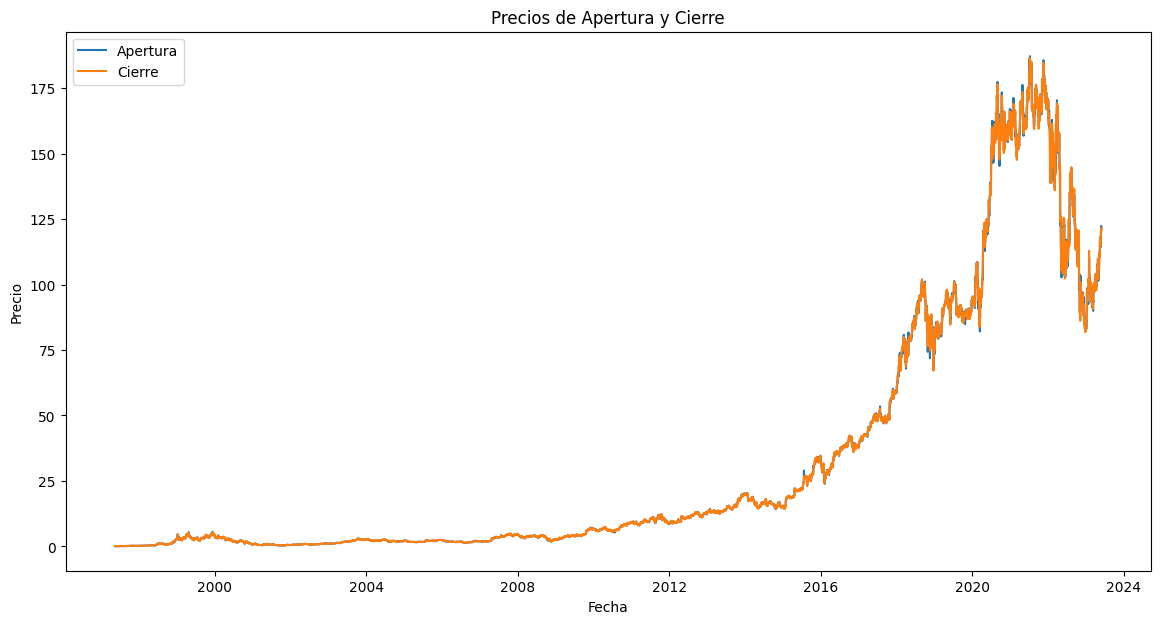

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
data = pd.read_csv('AMZN.csv', sep=',', decimal='.')

# Asegurarse de que los datos están en el formato correcto
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Crear un gráfico de líneas
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Open'], label='Apertura')
plt.plot(data['Date'], data['Close'], label='Cierre')

# Añadir títulos y etiquetas
plt.title('Precios de Apertura y Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6549,2023-05-24,115.349998,117.339996,115.019997,116.750000,116.750000,63487900
6550,2023-05-25,116.629997,116.870003,114.309998,115.000000,115.000000,66496700
6551,2023-05-26,116.040001,121.500000,116.019997,120.110001,120.110001,96779900
6552,2023-05-30,122.370003,122.919998,119.860001,121.660004,121.660004,64314800


In [ ]:
data = data.drop(['Open', 'Low','Close','Adj Close','Volume'], axis=1)
data.set_index('Date', inplace=True)

data

,High
Date,
1997-05-15,0.125000
1997-05-16,0.098958
1997-05-19,0.088542
1997-05-20,0.087500
1997-05-21,0.082292
...,...
2023-05-24,117.339996
2023-05-25,116.870003
2023-05-26,121.500000


In [ ]:
data = pd.Series(pd.Series(data['High']))
data

Date
1997-05-15      0.125000
1997-05-16      0.098958
1997-05-19      0.088542
1997-05-20      0.087500
1997-05-21      0.082292
                 ...    
2023-05-24    117.339996
2023-05-25    116.870003
2023-05-26    121.500000
2023-05-30    122.919998
2023-05-31    122.040001
Name: High, Length: 6554, dtype: float64

Epoch 1/100
164/164 [==============================] - 8s 16ms/step - loss: 6.0293e-04
Epoch 2/100
164/164 [==============================] - 2s 15ms/step - loss: 1.0748e-04
Epoch 3/100
164/164 [==============================] - 2s 15ms/step - loss: 7.7165e-05
Epoch 4/100
164/164 [==============================] - 3s 16ms/step - loss: 7.2761e-05
Epoch 5/100
164/164 [==============================] - 4s 22ms/step - loss: 6.7509e-05
Epoch 6/100
164/164 [==============================] - 2s 15ms/step - loss: 7.1608e-05
Epoch 7/100
164/164 [==============================] - 3s 15ms/step - loss: 5.3656e-05
Epoch 8/100
164/164 [==============================] - 3s 15ms/step - loss: 6.3537e-05
Epoch 9/100
164/164 [==============================] - 3s 17ms/step - loss: 5.6055e-05
Epoch 10/100
164/164 [==============================] - 3s 20ms/step - loss: 4.8220e-05
Epoch 11/100
164/164 [==============================] - 2s 15ms/step - loss: 6.7184e-05
Epoch 12/100
164/164 [===================

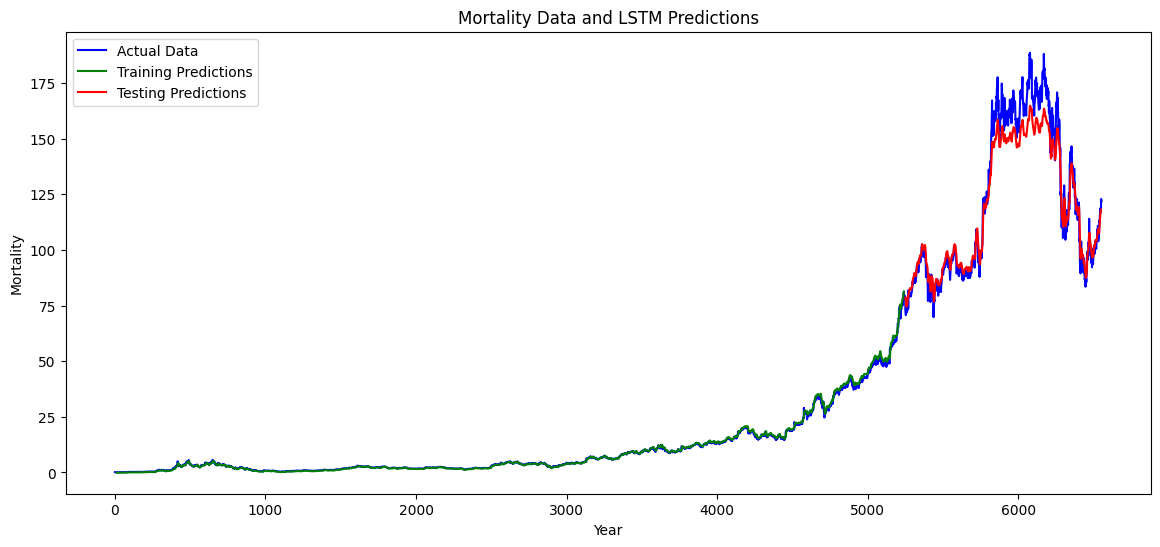

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


# Preprocesar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Dividir los datos para pruebas y entrenamiento
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Preparar los datos para RNN entramiento
def prepare_data(data, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

time_steps = 10
X_train, Y_train = prepare_data(train_data, time_steps)
X_test, Y_test = prepare_data(test_data, time_steps)

# Transformamos para aplicar  LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construimos el modelo RNN
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Hacer las prediccion
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertimos los datos para graficar
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform([Y_train])
test_predictions = scaler.inverse_transform(test_predictions)
Y_test = scaler.inverse_transform([Y_test])

# Mostramos los datos verdaderos
plt.figure(figsize=(14,6))
plt.plot(range(len(data)), data, color='blue', label='Actual Data')

# Mostrar las prediciones de entramiento
train_range = range(time_steps, len(train_predictions) + time_steps)
plt.plot(train_range, train_predictions.flatten(), color='green', label='Training Predictions')

# Mostrar las prediccion de prueba
test_range = range(len(train_predictions) + 2*time_steps, len(train_predictions) + 2*time_steps + len(test_predictions))
plt.plot(test_range, test_predictions.flatten(), color='red', label='Testing Predictions')

plt.title('Mortality Data and LSTM Predictions')
plt.xlabel('Year')
plt.ylabel('Mortality')
plt.legend()
plt.show()



Epoch 1/100
164/164 [==============================] - 5s 30ms/step - loss: 4.2614e-05 - val_loss: 0.0097
Epoch 2/100
164/164 [==============================] - 3s 17ms/step - loss: 4.1302e-05 - val_loss: 0.0067
Epoch 3/100
164/164 [==============================] - 3s 16ms/step - loss: 4.6305e-05 - val_loss: 0.0112
Epoch 4/100
164/164 [==============================] - 3s 17ms/step - loss: 3.9908e-05 - val_loss: 0.0106
Epoch 5/100
164/164 [==============================] - 4s 23ms/step - loss: 4.2403e-05 - val_loss: 0.0049
Epoch 6/100
164/164 [==============================] - 3s 16ms/step - loss: 4.5774e-05 - val_loss: 0.0053
Epoch 7/100
164/164 [==============================] - 3s 17ms/step - loss: 4.5596e-05 - val_loss: 0.0068
Epoch 8/100
164/164 [==============================] - 3s 17ms/step - loss: 4.0982e-05 - val_loss: 0.0071
Epoch 9/100
164/164 [==============================] - 4s 23ms/step - loss: 4.2857e-05 - val_loss: 0.0106
Epoch 10/100
164/164 [========================

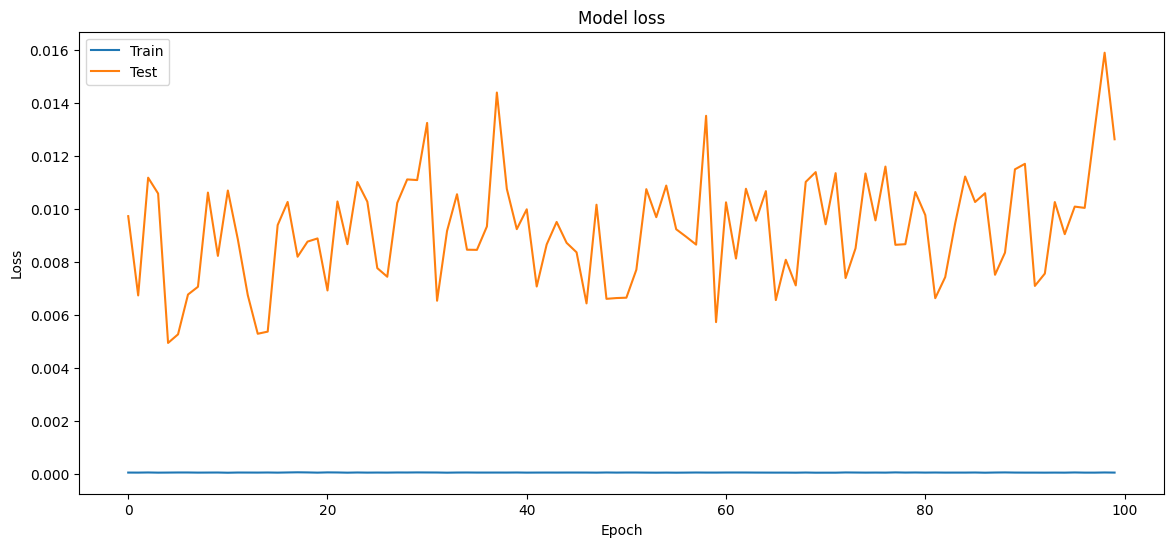

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


# Preprocesar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Dividir los datos para pruebas y entrenamiento
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Preparar los datos para RNN entramiento
def prepare_data(data, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

time_steps = 10
X_train, Y_train = prepare_data(train_data, time_steps)
X_test, Y_test = prepare_data(test_data, time_steps)

# Transformamos para aplicar  LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Continuar con el entrenamiento del modelo
history = model.fit(X_train, Y_train, epochs=100, batch_size=32,validation_data=(X_test, Y_test))

# Hacer las prediccion
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invertimos los datos para graficar
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform([Y_train])
test_predictions = scaler.inverse_transform(test_predictions)
Y_test = scaler.inverse_transform([Y_test])

# Calcular las métricas de error
train_mae = mean_absolute_error(Y_train[0], train_predictions[:,0])
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:,0]))

test_mae = mean_absolute_error(Y_test[0], test_predictions[:,0])
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:,0]))

print(f'Train MAE: {train_mae}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test RMSE: {test_rmse}')

# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(14,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 1/100
164/164 [==============================] - 2s 15ms/step - loss: 4.1555e-05
Epoch 2/100
164/164 [==============================] - 2s 15ms/step - loss: 4.0417e-05
Epoch 3/100
164/164 [==============================] - 2s 15ms/step - loss: 3.8110e-05
Epoch 4/100
164/164 [==============================] - 3s 21ms/step - loss: 4.1101e-05
Epoch 5/100
164/164 [==============================] - 2s 15ms/step - loss: 3.9481e-05
Epoch 6/100
164/164 [==============================] - 2s 15ms/step - loss: 3.8964e-05
Epoch 7/100
164/164 [==============================] - 2s 15ms/step - loss: 4.1390e-05
Epoch 8/100
164/164 [==============================] - 2s 15ms/step - loss: 4.0850e-05
Epoch 9/100
164/164 [==============================] - 4s 21ms/step - loss: 4.1460e-05
Epoch 10/100
164/164 [==============================] - 2s 15ms/step - loss: 3.9977e-05
Epoch 11/100
164/164 [==============================] - 2s 15ms/step - loss: 4.2535e-05
Epoch 12/100
164/164 [===================

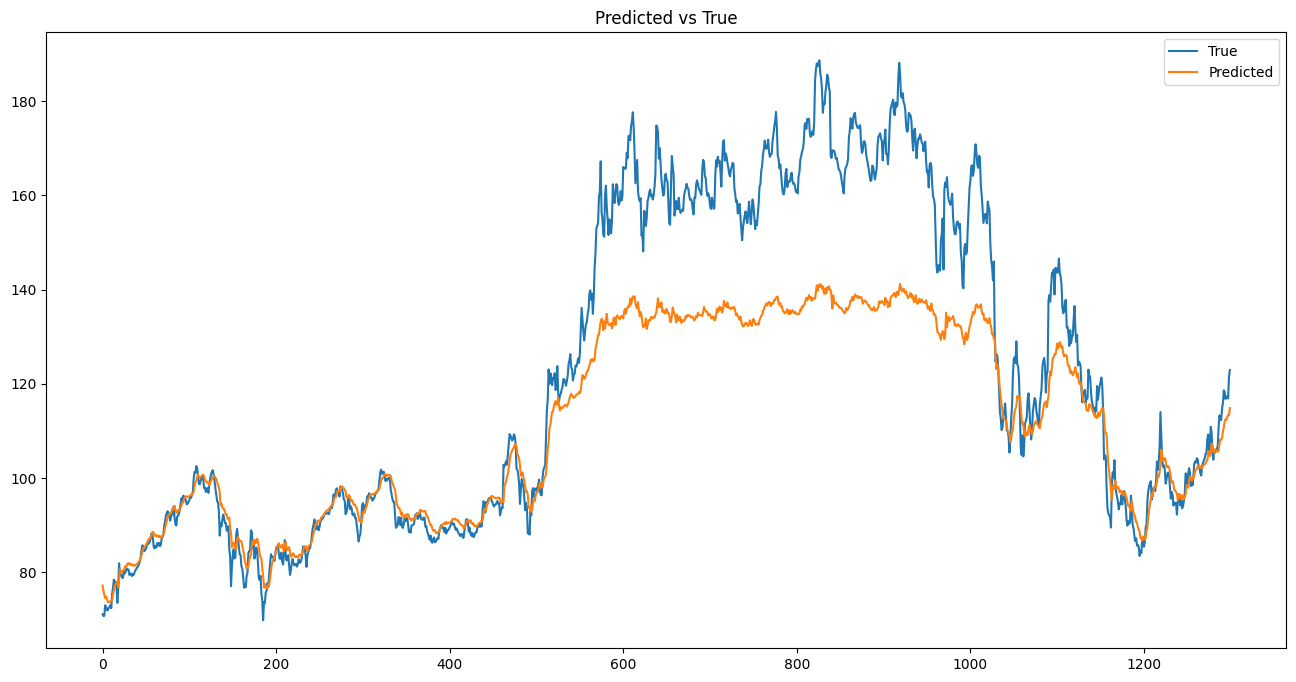

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Preprocesar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Dividir los datos para pruebas y entrenamiento
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Preparar los datos para RNN entramiento
def prepare_data(data, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

time_steps = 10
X_train, Y_train = prepare_data(train_data, time_steps)
X_test, Y_test = prepare_data(test_data, time_steps)

# Transformamos para aplicar  LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Continuar con el entrenamiento del modelo
history = model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Hacer las prediccion
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluar el modelo
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))

test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, math.sqrt(test_score)))

# Invertimos los datos para graficar
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform([Y_train])
test_predictions = scaler.inverse_transform(test_predictions)
Y_test = scaler.inverse_transform([Y_test])

# Visualizar las predicciones
plt.figure(figsize=(16, 8))
plt.plot(Y_test[0], label='True')
plt.plot(test_predictions[:,0], label='Predicted')
plt.title('Predicted vs True')
plt.legend()
plt.show()


Conclusiones


En resumen, el uso de Redes Neuronales Recurrentes (RNN) para la predicción de acciones de Amazon ha demostrado ser una herramienta prometedora y efectiva en el análisis y pronóstico del mercado financiero. Al aprovechar la capacidad de las RNN para capturar patrones y dependencias secuenciales en los datos, se puede obtener una visión más precisa de las tendencias y los movimientos futuros de las acciones de Amazon.

Al entrenar una RNN con datos históricos de precios de acciones, junto con otros indicadores relevantes como el volumen de operaciones y las noticias relacionadas con la compañía, el modelo puede aprender a reconocer correlaciones y comportamientos sutiles en los datos. Esto le permite generar predicciones a futuro sobre el precio de las acciones de Amazon con una cantidad razonable de precisión.

Sin embargo, es importante destacar que las predicciones generadas por una RNN no están exentas de incertidumbre y riesgo. El mercado financiero es inherentemente volátil y está influenciado por diversos factores, incluidos eventos impredecibles o cambios en las condiciones económicas y políticas. Por lo tanto, aunque las RNN pueden proporcionar una guía valiosa para la toma de decisiones de inversión, siempre se recomienda tener en cuenta otros factores y realizar un análisis adicional antes de tomar decisiones financieras importantes.

En conclusión, el uso de RNN para predecir acciones de Amazon es una estrategia interesante y poderosa para los inversores. Estas redes neuronales recurrentes tienen la capacidad de procesar secuencias de datos históricos y capturar correlaciones a largo plazo en los movimientos del precio de las acciones. Sin embargo, es importante complementar estas predicciones con una evaluación integral de otros factores y riesgos asociados al mercado financiero.

Bibliografía

Koehrsen, W. (2018, November 5). Recurrent Neural Networks by Example in Python - Towards Data Science. Medium; Towards Data Science. https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470

‌

Working with RNNs. (2023). Working with RNNs. TensorFlow. https://www.tensorflow.org/guide/keras/working_with_rnns






Abid Ali Awan. (2022, March 16). Recurrent Neural Network Tutorial (RNN). Datacamp.com; DataCamp. https://www.datacamp.com/tutorial/tutorial-for-recurrent-neural-network

‌‌

‌